# a.

## loading OpenCV digits images

In [1]:
import cv2
import urllib.request
from IPython.display import display, Image

### downloading from the url link

In [2]:
image_url = "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/digits.png"

In [234]:
import cv2
import numpy as np
import urllib.request

resp = urllib.request.urlopen(image_url)
image_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Saving the image to a file
cv2.imwrite('temp_image.jpg', image)

image_from_file = cv2.imread('temp_image.jpg')

import os
os.remove('temp_image.jpg')


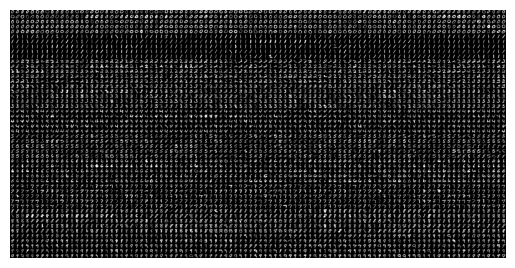

In [215]:
import matplotlib.pyplot as plt

image_rgb = cv2.cvtColor(image_from_file, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')  
plt.show()

In [29]:
image.shape

(1000, 2000, 3)

### image has 1000 instances 

### seperating different classes 

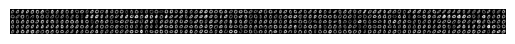

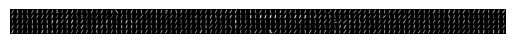

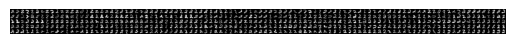

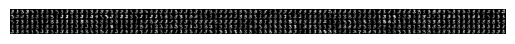

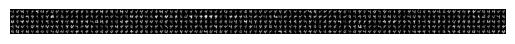

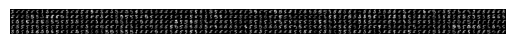

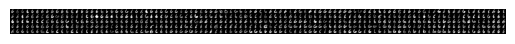

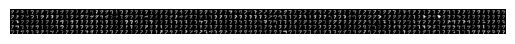

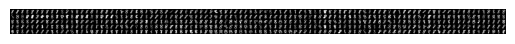

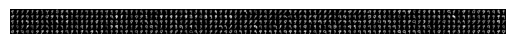

In [149]:
k = 100
for i in range(0, 1000,k): 
    image_k = image[i:i + k]
    plt.imshow(image_k)
    plt.axis('off')  
    plt.show()

### Extracting every single row images

In [235]:
k = 100
for i in range(0, 1000,k): 
    image_k = image[i:i + k]
    for j in range(0, image_k.shape[0], 20): 
        row_image= image_k[j:20 + j, :, :]
        plt.imshow(row_image)
        plt.axis('off')  
        plt.show()
    

### Extracting every single image from the images 

In [236]:
lis = []
label = 0  
for i in range(0, 1000, 100):
    image_k = gray_image[i:i + 100]
    
    for j in range(0, image_k.shape[0], 20): 
        row_image = image_k[j:j + 20, ]
        for k in range(0, 2000, 20): 
            single_img = row_image[:, k:k + 20]
            lis.append([single_img, label])
    
    label += 1  

### storing the images in data frame with their own labels 

In [237]:
X_flat = [item[0].reshape(-1) for item in lis]
df = pd.DataFrame(X_flat)
df['label'] = [item[1] for item in lis]

In [238]:
df

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


# b.

## Splitting dataset

In [240]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['label']), df['label'], test_size=0.2, random_state=42)

# c.

## A full explanation is included in the report file

# d.

### a logistic regression model as a multi-class classifier

In [223]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg_multiclass = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

logreg_multiclass.fit(X_train, y_train)
y_pred = logreg_multiclass.predict(X_test)


# e.

## Accuracy

In [232]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.865


# f.

## Confusion matrix

Confusion matrix:
[[103   0   5   0   0   1   1   0   0   1]
 [  0  98   1   0   0   1   0   0   4   1]
 [  0   1  87   4   4   1   2   1   5   0]
 [  0   0   5  77   0   2   0   0   0   1]
 [  1   0   3   0  80   0   1   0   2   7]
 [  1   0   0   7   1  82   0   0   4   3]
 [  2   0   7   0   1   5  82   0   1   0]
 [  0   1   2   4   1   0   0  94   1   9]
 [  0   2   1   3   1   6   0   0  66   2]
 [  0   0   2   2   4   2   0   5   0  96]]


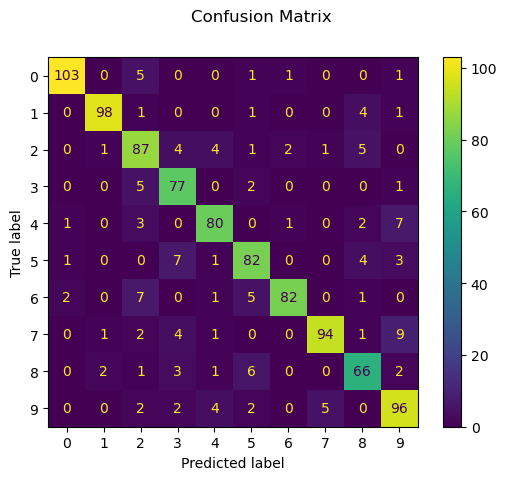

In [233]:
from sklearn import metrics
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()